### Understanding the data

In [552]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [553]:
#Uploading the data
telecom_data=pd.read_csv("telecom_churn_data.csv")

In [554]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [555]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [556]:
telecom_data.shape

(99999, 226)

### Imputing and deriving new metrics

In [557]:
#Imputing NaN values with 0 for totat recharge amounnt of data and voice calls
telecom_data['av_rech_amt_data_6'].fillna(0,inplace=True)
telecom_data['av_rech_amt_data_7'].fillna(0,inplace=True)
telecom_data['total_rech_amt_7'].fillna(0,inplace=True)
telecom_data['total_rech_amt_6'].fillna(0,inplace=True)

In [558]:
#Imputing NaN values with 0 for totat no of recharges for data
telecom_data['total_rech_data_7'].fillna(0,inplace=True)
telecom_data['total_rech_data_6'].fillna(0,inplace=True)

In [559]:
#Step1 : Deriving new metrics
#Calculating total recharge amount for data
telecom_data['total_rech_data_amt_7'] = telecom_data['av_rech_amt_data_7'] * telecom_data['total_rech_data_7']
telecom_data['total_rech_data_amt_6'] = telecom_data['av_rech_amt_data_6'] * telecom_data['total_rech_data_6']

In [560]:
#Step2 : Filtering hig value customers
#Calculating average amount of total recharge done for both Jun(6) and July(7)
telecom_data['avg_rech_6_7'] = (telecom_data['total_rech_data_amt_7'] + telecom_data['total_rech_data_amt_6'] + telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7'])/4

In [561]:
#Inspecting average recharge amount
telecom_data['avg_rech_6_7'].head()

0    279.50
1    153.00
2    120.75
3    135.00
4    150.50
Name: avg_rech_6_7, dtype: float64

In [562]:
#Filtering out high value customers who have done average recharge greater than or equal to 70th percentile of average amount of June and July
telecom_data_high_cust = telecom_data[(telecom_data['avg_rech_6_7'] >= round(np.percentile(telecom_data['avg_rech_6_7'],70),2))]

In [563]:
#Inspecting final data frame of high value customers
telecom_data_high_cust.shape

#We got total 30001 high value customers which is very close to 29.9k customers as mentioned in problem statement

(30001, 229)

In [564]:
#Step3 : Tag churners and remove attributes of the churn phase

#Inspecting null values for total incomming for month of August
telecom_data_high_cust['total_ic_mou_9'].isna().sum()

0

In [565]:
#Inspecting null values for total outgoing for month of August
telecom_data_high_cust['total_og_mou_9'].isna().sum()

0

In [566]:
#Inspecting null values for usage of 2g mobile data for month of August
telecom_data_high_cust['vol_2g_mb_9'].isna().sum()

0

In [567]:
#Inspecting null values for usage of 3g mobile data for month of August
telecom_data_high_cust['vol_3g_mb_9'].isna().sum()

0

In [568]:
#Creating a custom function to tag customers as churn =1/0 based on certain criteria
def isChurn(x):
    if x['total_ic_mou_9'] == 0 and x['total_og_mou_9'] == 0 and x['vol_2g_mb_9'] == 0 and x['vol_3g_mb_9'] == 0:
        return 1
    else:
        return 0

In [569]:
#Tagging customers as churn/Not churn by applying above custom function
telecom_data_high_cust['churn'] = telecom_data_high_cust.apply(isChurn,axis=1)

In [570]:
#Inspecting the total count of churned and not churned customers
print((telecom_data_high_cust['churn'].sum())/len(telecom_data_high_cust.index))
telecom_data_high_cust['churn'].value_counts()

#We can conclude that we have total 2.4k churned customers.

0.08136395453484883


0    27560
1     2441
Name: churn, dtype: int64

#### There is clearly a class imbalance which could effect our model

In [571]:
#Removing attrbiutes from final data frame for churn phase( with _9 suffix)
telecom_data_high_cust.drop([col for col in telecom_data_high_cust.columns if "_9" in col], axis=1, inplace=True)

In [572]:
telecom_data_high_cust.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7',
       ...
       'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'total_rech_data_amt_7', 'total_rech_data_amt_6',
       'avg_rech_6_7', 'churn'],
      dtype='object', length=176)

In [573]:
# Inspecting the null values in the filtered data
round(100*(telecom_data_high_cust.isnull().sum()/len(telecom_data_high_cust.index))).sort_values(ascending=False)

night_pck_user_8            47.0
fb_user_8                   47.0
count_rech_2g_8             47.0
count_rech_3g_8             47.0
total_rech_data_8           47.0
av_rech_amt_data_8          47.0
date_of_last_rech_data_8    47.0
arpu_3g_8                   47.0
arpu_2g_8                   47.0
max_rech_data_8             47.0
arpu_2g_6                   44.0
count_rech_2g_6             44.0
count_rech_3g_6             44.0
max_rech_data_6             44.0
date_of_last_rech_data_6    44.0
arpu_3g_6                   44.0
fb_user_6                   44.0
night_pck_user_6            44.0
night_pck_user_7            43.0
count_rech_2g_7             43.0
count_rech_3g_7             43.0
date_of_last_rech_data_7    43.0
arpu_3g_7                   43.0
arpu_2g_7                   43.0
fb_user_7                   43.0
max_rech_data_7             43.0
std_og_t2t_mou_8             4.0
loc_ic_mou_8                 4.0
std_ic_t2t_mou_8             4.0
isd_og_mou_8                 4.0
          

In [574]:
#Removing date columns as they hold any relevance in predicting the churn
telecom_data_high_cust.drop([col for col in telecom_data_high_cust.columns if "date" in col], axis=1, inplace=True)

In [575]:
# Inspecting the null values in the filtered data
round(100*(telecom_data_high_cust.isnull().sum()/len(telecom_data_high_cust.index))).sort_values(ascending=False)

count_rech_3g_8          47.0
max_rech_data_8          47.0
av_rech_amt_data_8       47.0
count_rech_2g_8          47.0
total_rech_data_8        47.0
night_pck_user_8         47.0
arpu_3g_8                47.0
fb_user_8                47.0
arpu_2g_8                47.0
max_rech_data_6          44.0
arpu_2g_6                44.0
night_pck_user_6         44.0
fb_user_6                44.0
arpu_3g_6                44.0
count_rech_3g_6          44.0
count_rech_2g_6          44.0
arpu_2g_7                43.0
count_rech_2g_7          43.0
fb_user_7                43.0
night_pck_user_7         43.0
arpu_3g_7                43.0
max_rech_data_7          43.0
count_rech_3g_7          43.0
loc_og_mou_8              4.0
loc_og_t2f_mou_8          4.0
loc_ic_mou_8              4.0
loc_og_t2c_mou_8          4.0
std_og_mou_8              4.0
std_ic_t2t_mou_8          4.0
std_og_t2t_mou_8          4.0
                         ... 
jun_vbc_3g                0.0
sep_vbc_3g                0.0
total_rech

In [576]:
# Removing the columns with more than 30% missing data
telecom_data_high_cust=telecom_data_high_cust.loc[:,round(100*(telecom_data_high_cust.isnull().sum()/len(telecom_data_high_cust.index))).sort_values(ascending=False)<30]

In [577]:
# Inspecting the null values in the filtered data
round(100*(telecom_data_high_cust.isnull().sum()/len(telecom_data_high_cust.index))).sort_values(ascending=False)>0

loc_ic_t2f_mou_8          True
std_ic_t2f_mou_8          True
std_og_t2t_mou_8          True
loc_og_t2c_mou_8          True
loc_ic_mou_8              True
loc_og_t2f_mou_8          True
std_ic_t2m_mou_8          True
std_ic_mou_8              True
loc_og_t2m_mou_8          True
std_og_t2m_mou_8          True
loc_og_t2t_mou_8          True
loc_ic_t2m_mou_8          True
ic_others_8               True
roam_og_mou_8             True
std_ic_t2t_mou_8          True
roam_ic_mou_8             True
loc_ic_t2t_mou_8          True
isd_ic_mou_8              True
og_others_8               True
std_og_t2f_mou_8          True
isd_og_mou_8              True
std_ic_t2o_mou_8          True
spl_og_mou_8              True
offnet_mou_8              True
spl_ic_mou_8              True
onnet_mou_8               True
std_og_mou_8              True
std_og_t2c_mou_8          True
loc_og_mou_8              True
std_ic_t2f_mou_6          True
                         ...  
jun_vbc_3g               False
sep_vbc_

In [578]:
round(100*telecom_data_high_cust.loc[:,telecom_data_high_cust.isnull().any()].isnull().sum()/len(telecom_data_high_cust.index),2).sort_values(ascending=False)

ic_others_8         3.91
std_og_t2t_mou_8    3.91
loc_ic_t2m_mou_8    3.91
loc_ic_t2t_mou_8    3.91
og_others_8         3.91
spl_og_mou_8        3.91
isd_og_mou_8        3.91
std_og_t2c_mou_8    3.91
std_og_t2f_mou_8    3.91
std_og_t2m_mou_8    3.91
loc_og_mou_8        3.91
loc_ic_mou_8        3.91
loc_og_t2c_mou_8    3.91
loc_og_t2f_mou_8    3.91
loc_og_t2m_mou_8    3.91
loc_og_t2t_mou_8    3.91
roam_og_mou_8       3.91
roam_ic_mou_8       3.91
offnet_mou_8        3.91
onnet_mou_8         3.91
loc_ic_t2f_mou_8    3.91
std_og_mou_8        3.91
std_ic_t2m_mou_8    3.91
spl_ic_mou_8        3.91
std_ic_t2t_mou_8    3.91
std_ic_t2f_mou_8    3.91
std_ic_mou_8        3.91
isd_ic_mou_8        3.91
std_ic_t2o_mou_8    3.91
std_ic_t2o_mou_6    1.82
                    ... 
loc_og_t2t_mou_7    1.79
loc_og_t2m_mou_7    1.79
spl_ic_mou_7        1.79
onnet_mou_7         1.79
roam_ic_mou_7       1.79
isd_ic_mou_7        1.79
loc_og_t2f_mou_7    1.79
std_ic_t2t_mou_7    1.79
loc_og_t2c_mou_7    1.79


In [579]:
# Computing percentage of rows for various numbers of missing values
num=[5,10,15,20,25,30,35,40,45,50]
for i in num:
    print(str(100*(len(telecom_data_high_cust[telecom_data_high_cust.isnull().sum(axis=1) > i].index) / len(telecom_data_high_cust.index)))+' for '+str(i))

4.989833672210926 for 5
4.989833672210926 for 10
4.989833672210926 for 15
4.989833672210926 for 20
4.989833672210926 for 25
1.6832772240925302 for 30
1.6832772240925302 for 35
1.6832772240925302 for 40
1.6832772240925302 for 45
1.6832772240925302 for 50


Lets have a look at rows with more than 5 missing values

In [580]:
# look at the summary again
round(100*(telecom_data_high_cust.isnull().sum()/len(telecom_data_high_cust.index)), 2).sort_values(ascending=False)

isd_ic_mou_8             3.91
std_og_t2t_mou_8         3.91
std_ic_t2o_mou_8         3.91
loc_og_t2f_mou_8         3.91
std_ic_t2f_mou_8         3.91
loc_og_t2m_mou_8         3.91
loc_og_mou_8             3.91
std_ic_t2m_mou_8         3.91
loc_og_t2t_mou_8         3.91
std_og_t2f_mou_8         3.91
std_ic_t2t_mou_8         3.91
roam_og_mou_8            3.91
loc_ic_mou_8             3.91
roam_ic_mou_8            3.91
loc_og_t2c_mou_8         3.91
loc_ic_t2f_mou_8         3.91
offnet_mou_8             3.91
loc_ic_t2m_mou_8         3.91
spl_ic_mou_8             3.91
onnet_mou_8              3.91
loc_ic_t2t_mou_8         3.91
std_og_t2c_mou_8         3.91
std_og_t2m_mou_8         3.91
og_others_8              3.91
std_og_mou_8             3.91
spl_og_mou_8             3.91
ic_others_8              3.91
isd_og_mou_8             3.91
std_ic_mou_8             3.91
spl_ic_mou_6             1.82
                         ... 
jun_vbc_3g               0.00
sep_vbc_3g               0.00
total_rech

In [581]:
#Imputing all NAN's in data frame with 0 since only number columns are left now
telecom_data_high_cust.fillna(0,inplace=True)

No missing values are left in the data and we are have retained 147 columns

In [582]:
telecom_data_high_cust.nunique().sort_values(ascending=True)

circle_id                1
loc_og_t2o_mou           1
std_og_t2o_mou           1
loc_ic_t2o_mou           1
std_ic_t2o_mou_8         1
std_ic_t2o_mou_7         1
std_ic_t2o_mou_6         1
std_og_t2c_mou_8         1
std_og_t2c_mou_7         1
std_og_t2c_mou_6         1
churn                    2
monthly_2g_6             5
monthly_2g_8             6
monthly_2g_7             6
monthly_3g_8            12
monthly_3g_6            12
monthly_3g_7            15
sachet_3g_6             25
sachet_3g_7             27
sachet_3g_8             29
sachet_2g_6             31
sachet_2g_8             34
sachet_2g_7             35
total_rech_data_6       38
total_rech_data_7       43
spl_ic_mou_6            78
spl_ic_mou_8            80
spl_ic_mou_7            92
total_rech_num_8        96
total_rech_num_7       101
                     ...  
loc_ic_t2m_mou_8     15122
loc_og_t2m_mou_8     15130
loc_ic_t2m_mou_6     15461
loc_ic_t2m_mou_7     15547
loc_og_t2m_mou_6     15625
loc_og_t2m_mou_7     15674
o

In [583]:
for col in telecom_data_high_cust.columns:
    if len(telecom_data_high_cust[col].unique()) == 1:
        telecom_data_high_cust.drop(col,inplace=True,axis=1)
        print (col)

circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8


In [584]:
telecom_data_high_cust.drop(['mobile_number'], axis =1, inplace = True)

In [585]:
#Checking for class imbalance again
print((telecom_data_high_cust['churn'].sum())/len(telecom_data_high_cust.index))
telecom_data_high_cust['churn'].value_counts()


0.08136395453484883


0    27560
1     2441
Name: churn, dtype: int64

### Identifying Important redictors

In [586]:
X=telecom_data_high_cust.drop(['churn'],axis=1)
y=telecom_data_high_cust['churn']

In [587]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_7,total_rech_data_amt_6,avg_rech_6_7
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,279.5
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,592.5
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,0,315,21.03,910.65,122.16,0.00,354.0,0.0,348.0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0,0,720,0.00,0.00,0.00,0.00,0.0,0.0,320.0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,0,1,604,40.45,51.86,0.00,0.00,712.0,0.0,291.5


In [588]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [589]:
X_train.shape

(21000, 132)

In [590]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(class_weight="balanced")
model.fit(X_train, y_train)
immportance_arr = model.feature_importances_

In [591]:
immportance_arr

array([0.00603068, 0.00841693, 0.04124258, 0.00669911, 0.00470719,
       0.00780387, 0.00727517, 0.00688646, 0.01196515, 0.0038396 ,
       0.00420099, 0.01050952, 0.00419361, 0.00731158, 0.01138103,
       0.00385896, 0.00543047, 0.00790624, 0.00493199, 0.00715705,
       0.0209857 , 0.00346222, 0.00360371, 0.00916814, 0.00379339,
       0.00427342, 0.00504009, 0.0047572 , 0.00626851, 0.01411753,
       0.00804116, 0.00760188, 0.01203832, 0.00870546, 0.00590049,
       0.00806495, 0.00194962, 0.0019097 , 0.00275553, 0.00799377,
       0.00665857, 0.01211901, 0.00160662, 0.00209866, 0.00134139,
       0.0041079 , 0.00472151, 0.00806904, 0.0034768 , 0.00052387,
       0.00043352, 0.00642849, 0.00781131, 0.01737837, 0.00447632,
       0.00651491, 0.01328227, 0.01322907, 0.00673599, 0.05161196,
       0.00424994, 0.00521428, 0.00672057, 0.00520372, 0.01698824,
       0.0246428 , 0.00358318, 0.00383489, 0.00407842, 0.00373207,
       0.00487277, 0.00720473, 0.00227968, 0.00257736, 0.00289

In [592]:
imp_col = pd.DataFrame(immportance_arr)

In [593]:
imp_col['Features'] = X_train.columns

In [594]:
imp_col.columns = ['Importance','Feature Name']

In [595]:
imp_col = imp_col.sort_values(by=['Importance'],ascending=False)

In [596]:
imp_col.reset_index()

,index,Importance,Feature Name
0,59,0.051612,loc_ic_t2m_mou_8
1,2,0.041243,arpu_8
2,92,0.037897,total_rech_num_8
3,101,0.027420,last_day_rch_amt_8
4,65,0.024643,loc_ic_mou_8
5,124,0.023183,aon
6,20,0.020986,loc_og_t2m_mou_8
7,111,0.020904,vol_3g_mb_8
8,95,0.020804,total_rech_amt_8
9,53,0.017378,total_og_mou_8


# Performing PCA on train data set

In [597]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [598]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [599]:
pca.components_

array([[-1.52571055e-02, -1.10956271e-02, -1.46108315e-02, ...,
         5.59526376e-01,  4.14274034e-01,  2.34284816e-01],
       [ 1.65297640e-01,  1.99649899e-01,  1.97720255e-01, ...,
         2.03466393e-01,  1.15751227e-01,  1.88836549e-01],
       [ 1.35401294e-01,  1.25273997e-01,  1.65921627e-01, ...,
        -3.62407893e-01, -1.69399095e-01, -5.47629942e-02],
       ...,
       [-3.40691772e-16,  4.20152373e-16,  1.25369165e-16, ...,
        -2.23602010e-01, -2.23602010e-01,  8.94408040e-01],
       [ 0.00000000e+00, -1.61851695e-18,  9.88156732e-18, ...,
        -1.45260497e-03, -1.45260497e-03,  5.81041989e-03],
       [-0.00000000e+00, -8.12042345e-19, -1.41441929e-18, ...,
         1.76303722e-04,  1.76303722e-04, -7.05214888e-04]])

In [600]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.015257,0.165298,arpu_6
1,-0.011096,0.199650,arpu_7
2,-0.014611,0.197720,arpu_8
3,-0.064991,0.115659,onnet_mou_6
4,-0.072272,0.139741,onnet_mou_7


In [601]:
pca.explained_variance_ratio_

array([2.63553513e-01, 1.90027237e-01, 8.79770515e-02, 6.91540199e-02,
       5.26056275e-02, 4.80019790e-02, 4.25970908e-02, 4.05264914e-02,
       3.46694565e-02, 2.31871934e-02, 1.70505672e-02, 1.55469254e-02,
       1.38700300e-02, 1.17925061e-02, 1.02402034e-02, 8.64705995e-03,
       7.09793749e-03, 5.90942303e-03, 5.42293176e-03, 4.34940104e-03,
       4.30627508e-03, 3.45558433e-03, 3.26548164e-03, 3.16676833e-03,
       3.03923402e-03, 2.90524621e-03, 2.59733875e-03, 2.50935687e-03,
       2.03207918e-03, 1.85556267e-03, 1.74928422e-03, 1.64473961e-03,
       1.36028348e-03, 1.27297072e-03, 1.16814522e-03, 9.33300523e-04,
       8.24727567e-04, 7.86096684e-04, 7.34509451e-04, 5.97500352e-04,
       5.91381955e-04, 5.50416103e-04, 5.16360072e-04, 5.11434873e-04,
       4.79138460e-04, 4.72027693e-04, 4.37369026e-04, 4.04448036e-04,
       3.49812734e-04, 3.46946669e-04, 3.33536613e-04, 2.94572886e-04,
       2.90592342e-04, 2.79688221e-04, 2.52363762e-04, 1.98173912e-04,
      

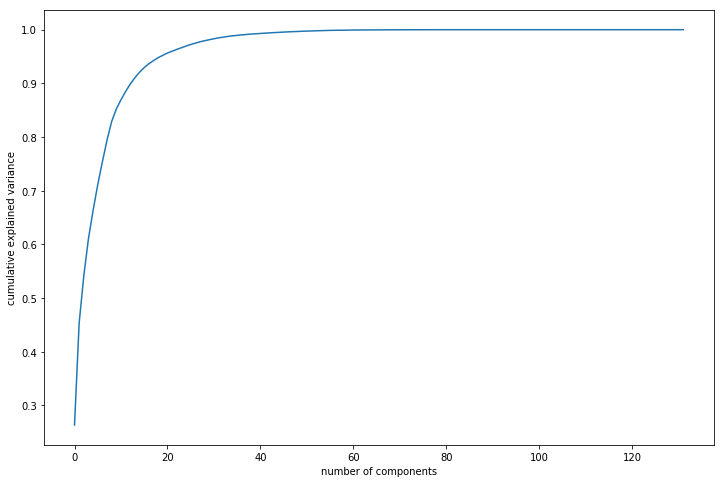

In [602]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We'll choose 20 components for modelling as it shows 90% of data vriance which is good.

In [603]:
#Using incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)

In [604]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21000, 20)

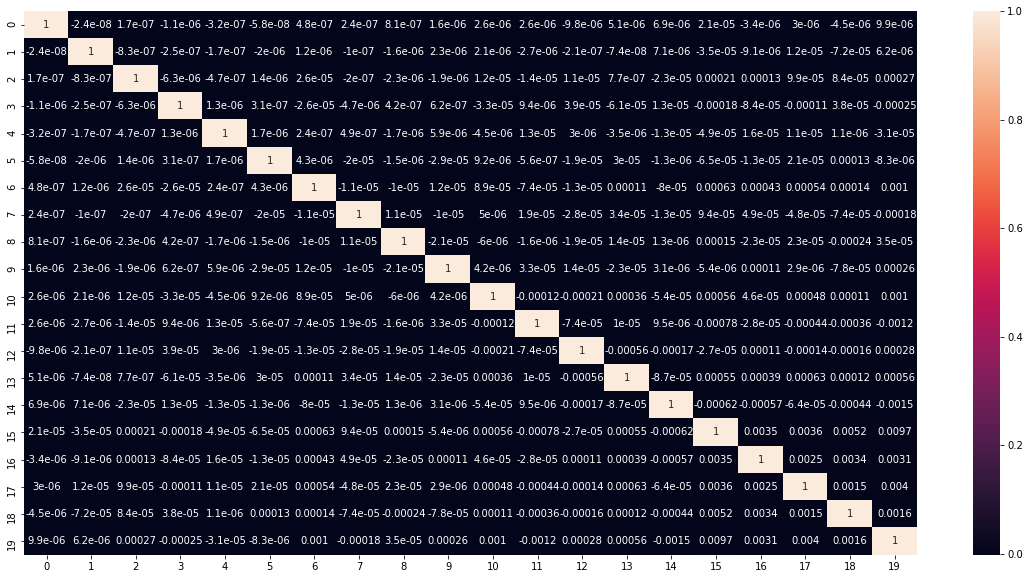

In [605]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

#We can see from below there is hardly any correlation between pca components.

In [606]:
#Converting trained pca data into data frame and inspecting size of train pca data frame
df_train_pca=pd.DataFrame(df_train_pca)
print(df_train_pca.shape)
df_train_pca.head()

(21000, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-449.526954,-926.715605,-1444.010517,1004.117839,-69.547681,389.913825,211.795391,2119.308847,639.711099,392.283187,-157.202162,0.469659,-222.678205,-104.809402,-6.599225,-257.316628,-187.928760,503.998710,-340.913557,-146.168209
1,79.921727,-919.773652,-609.211892,550.370452,51.553118,490.017579,473.327064,499.827474,179.465477,41.722743,19.925318,-214.855815,86.469256,121.306574,-87.439505,103.172507,62.249492,-31.212669,73.457354,-68.206405
2,-433.967710,-1251.438039,-543.188913,832.656432,-356.292207,865.662044,969.958690,1227.153586,277.757364,-61.839043,-36.636306,4.069046,-198.863481,-68.146859,-102.288912,34.349256,-20.382009,-132.485057,-1.791110,-105.206385
3,-1828.695040,1507.762739,-265.985634,410.727352,467.138944,1795.844861,-627.579941,-1203.621261,1923.959159,1169.706168,1294.228880,-1766.821669,110.723748,-353.670303,384.903705,-652.843355,1771.123753,-882.350748,-946.182078,38.992348
4,104.852458,-1105.820458,-285.125388,-314.180788,-15.914133,-508.690608,-389.558414,-927.693355,-136.772104,385.472155,-190.960974,150.246024,-5.260633,-105.529979,-94.517839,96.569554,-55.604105,90.459660,66.256965,23.488761


In [607]:
#Predicting the output of churn output variable on train data set.
columnList=df_train_pca.columns
y_train=y_train.reset_index()
df_train_pca['output']=y_train['churn']

In [608]:
#Inpsecting final pca data set for total no of rows available.
y_train=df_train_pca['output']
df_train_pca.drop(['output'],axis=1,inplace=True)
print(df_train_pca.shape)

(21000, 20)


In [609]:
#Applying selected components to the test data - 20 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 20)

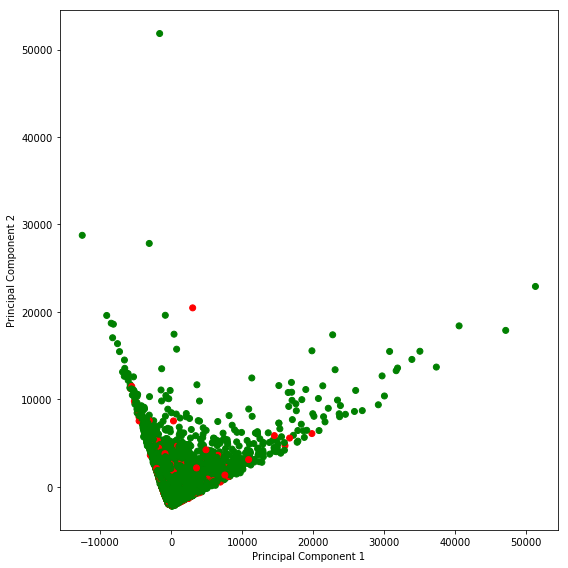

In [610]:
#Plotting two principal commponents to check the variance of data
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:][0], df_train_pca[:][1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

#From below plot we can see that data points are quite clearly segggregated.

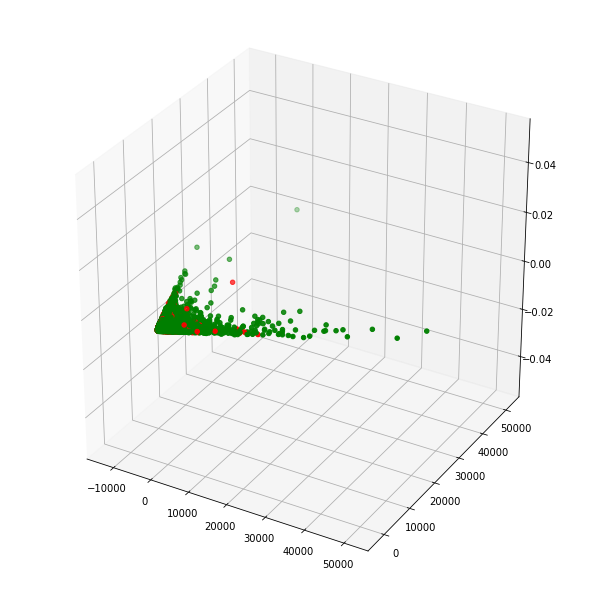

In [611]:
#Inspecting 3d view of principal components plot
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
# ax = plt.axes(projection='3d')
ax.scatter( df_train_pca.iloc[:,0], df_train_pca.iloc[:,1], c=y_train.map({0:'green',1:'red'}))
plt.show()

<h3> Trying Different Models

In [612]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

<b> Grid search function to find optimal hyperparameters

In [613]:
def ApplyGridSearchCV(model,params):
    # creating a KFold object with 5 splits 
    folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
    
    # set up grid search scheme
    # note that we are still using the 5 fold CV scheme we set up earlier
    model_cv = GridSearchCV(estimator = model, 
                            param_grid = params, 
                            scoring= 'recall', 
                            cv = folds, 
                            verbose = 1,
                           return_train_score=True)      
    model_cv.fit(df_train_pca, y_train) 
    cv_results = pd.DataFrame(model_cv.cv_results_)
    # plot of C versus train and test scores
    return cv_results

In [614]:
#Plotting ROC curve
def draw_roc_curve( y_test, pred_proba_test ):        
    fpr_test, tpr_test, thresholds = metrics.roc_curve(y_test, pred_proba_test)
    #fpr_tr, tpr_tr, thresholds = metrics.roc_curve(y_tr, pred_proba_tr[:,1])
    auc_test=metrics.roc_auc_score(y_test,pred_proba_test)
    #auc_tr=roc_auc_score(y_tr,pred_proba_tr[:,1])
    #plt.plot(fpr_tr, tpr_tr, 'b-', label='Train_ROC= %.2f'  %(auc_tr))
    plt.plot(fpr_test, tpr_test, 'r-', label='Test_ROC= %.2f'  %(auc_test))
    plt.plot(fpr_test, fpr_test, 'g-', label='x=y')
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.grid(True)
    plt.title('Receiver operating characteristic example')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()
    return auc_test

In [615]:
#Plotting consfusion matirx to check total positive prediction rate
def plotconfusionmatrix(y_test,pred_test):
    df=metrics.confusion_matrix(y_test, pred_test);
    labels = ['Negative', 'Positive']
    ax= plt.subplot()
    sns.heatmap(df, annot=True, ax = ax,fmt='g');
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
    ax.set_title('Confusion Matrix'); 
    plt.show();
    return df

In [616]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

def getMetrics(y_test,pred_test):
#     TP = confusion[1,1] # true positive 
#     TN = confusion[0,0] # true negatives
#     FP = confusion[0,1] # false positives
#     FN = confusion[1,0] # false negatives
#     Precision=TP/(TP+FP)
#     Recall=TP/(TP+FN)
#     print('Precision')
#     print(Precision)
#     print('Recall')
#     print(Recall)
    accuracy = accuracy_score(y_test, pred_test)
    precision = precision_score(y_test, pred_test)
    recall = recall_score(y_test, pred_test)
    f1 = f1_score(y_test, pred_test)
    print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
    print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
    print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
    print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))

<b> 1) Logistic Regression with PCA

In [617]:
from sklearn.linear_model import LogisticRegression

params = {"C": [0.01,0.1, 1, 10, 100, 1000],"penalty":['l1','l2']}
model = LogisticRegression(class_weight='balanced')
cv_results_LR=ApplyGridSearchCV(model,params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   24.9s finished


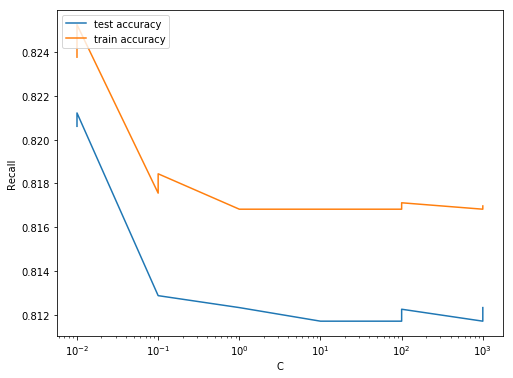

In [618]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results_LR['param_C'], cv_results_LR['mean_test_score'])
plt.plot(cv_results_LR['param_C'], cv_results_LR['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [619]:
cv_results_LR[cv_results_LR['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,1.011126,0.373362,0.001776,0.00118,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.801153,0.825688,0.84472,...,0.821226,0.014186,1,0.831845,0.829179,0.818846,0.823054,0.823396,0.825264,0.004652


In [620]:
cv_results_LR.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.125073,0.013514,0.003385,0.000798,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.801153,0.822630,0.844720,...,0.820614,0.014045,2,0.828869,0.829179,0.817385,0.822320,0.821132,0.823777,0.004584
1,1.011126,0.373362,0.001776,0.001180,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.801153,0.825688,0.844720,...,0.821226,0.014186,1,0.831845,0.829179,0.818846,0.823054,0.823396,0.825264,0.004652
2,0.062234,0.005871,0.002001,0.000621,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.792507,0.816514,0.832298,...,0.812869,0.012721,3,0.821429,0.824047,0.813733,0.814244,0.814340,0.817558,0.004314
3,0.659660,0.028576,0.001376,0.000478,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.792507,0.816514,0.832298,...,0.812869,0.012721,3,0.822917,0.824047,0.814463,0.816446,0.814340,0.818443,0.004197
4,0.065226,0.008662,0.001602,0.000493,1,l1,"{'C': 1, 'penalty': 'l1'}",0.792507,0.816514,0.832298,...,0.812322,0.012827,5,0.820685,0.822581,0.813002,0.813510,0.814340,0.816823,0.003995


<b> For best hyperparameters we get C=0.01 and penalty as 'l2'

In [621]:
#Applying Logistic Regression
#Training the model on the train data

learner_pca = LogisticRegression(class_weight='balanced',penalty='l2',C=0.01)
model_pca = learner_pca.fit(df_train_pca,y_train)

In [622]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

#With 20 selected principal components and logistic regression model we have achieved 87% of accuracy 

'0.87'

In [623]:
# Predicted probabilities of conversion on test data set
y_pred=model_pca.predict_proba(df_test_pca)
# Converting it into dataframe
y_pred_df=pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1=y_pred_df.iloc[:,[1]]

y_test_df = pd.DataFrame(y_test)

In [624]:
# Putting CustID to index to final output variable data set
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,churn,Churn_Prob
0,20296,1,0.775135
1,8279,1,0.561468
2,72269,0,0.079975
3,65602,0,0.334782
4,42758,1,0.701448


In [625]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

#We have chosen probability cutoff as 0.5 i.e if probability >0.5 then potential lead is likely to churn  else not

,CustID,churn,Churn_Prob,predicted
0,20296,1,0.775135,1
1,8279,1,0.561468,1
2,72269,0,0.079975,0
3,65602,0,0.334782,0
4,42758,1,0.701448,1


In [626]:
#Importing metrics module to calculate accuracy of the final predicted values
from sklearn import metrics
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

#We have achieved 80% of accuracy using selected model.

0.7894678369070103

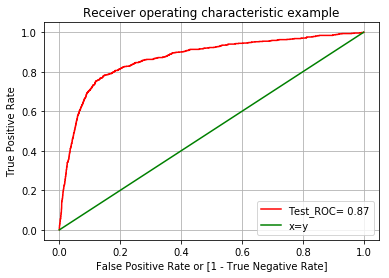

0.869487496465075


In [627]:
auc_test=draw_roc_curve( y_pred_final.churn, y_pred_final.Churn_Prob )
print(auc_test)

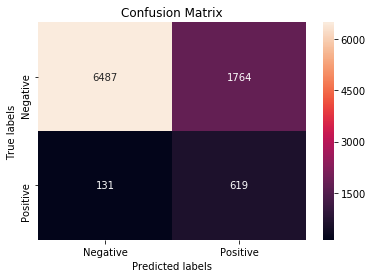

In [628]:
# Confusion matrix 
confusion=plotconfusionmatrix( y_pred_final.churn, y_pred_final.predicted )

In [629]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.churn,y_pred_final.predicted))

             precision    recall  f1-score   support

          0       0.98      0.79      0.87      8251
          1       0.26      0.83      0.40       750

avg / total       0.92      0.79      0.83      9001



In [630]:
getMetrics(y_pred_final.churn,y_pred_final.predicted)

Accuracy_score: 78.95% on test dataset
precision_score: 25.98% on test dataset
recall_score: 82.53% on test dataset
f1_score: 39.51% on test dataset


<b> Random Forest

In [631]:
from sklearn.ensemble import RandomForestClassifier

depth=[5, 10,50, 100]
n_estimators=[100, 200]
params = {'max_depth':depth,'n_estimators':n_estimators}
model = RandomForestClassifier(class_weight='balanced')
cv_results_RF=ApplyGridSearchCV(model,params)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  4.3min finished


In [632]:
cv_results_RF.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.456047,0.029985,0.036908,0.002747,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.720461,0.721713,0.739130,...,0.719132,0.014436,1,0.780506,0.771994,0.772827,0.792952,0.775849,0.778826,0.007667
1,5.078642,0.198611,0.068019,0.002041,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.708934,0.709480,0.723602,...,0.709935,0.007757,2,0.779018,0.766129,0.773557,0.787078,0.776604,0.776477,0.006848
2,4.041767,0.158655,0.049472,0.001015,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.561960,0.568807,0.540373,...,0.543165,0.026200,3,0.891369,0.896628,0.887509,0.900881,0.900377,0.895353,0.005193
3,8.231820,0.176315,0.097532,0.001167,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.556196,0.559633,0.524845,...,0.541628,0.021199,4,0.904018,0.906891,0.901388,0.894273,0.898113,0.900937,0.004417
4,5.493566,0.159485,0.075807,0.016236,50,100,"{'max_depth': 50, 'n_estimators': 100}",0.100865,0.113150,0.096273,...,0.103252,0.011282,8,0.999256,1.000000,1.000000,1.000000,1.000000,0.999851,0.000298


In [633]:
cv_results_RF[cv_results_LR['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,5.078642,0.198611,0.068019,0.002041,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.708934,0.70948,0.723602,...,0.709935,0.007757,2,0.779018,0.766129,0.773557,0.787078,0.776604,0.776477,0.006848


In [634]:
learner_pca_RF = RandomForestClassifier(class_weight='balanced',max_depth=5,n_estimators=200)
model_pca_RF = learner_pca_RF.fit(df_train_pca,y_train)

In [635]:
#Making prediction on the test data
pred_probs_test = model_pca_RF.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

#With 20 selected principal components and Random Forest model we have achieved 87% of accuracy 

'0.86'

In [636]:
# Predicted probabilities of conversion on test data set
y_pred=model_pca_RF.predict_proba(df_test_pca)
# Converting it into dataframe
y_pred_df=pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1=y_pred_df.iloc[:,[1]]

y_test_df = pd.DataFrame(y_test)

In [637]:
# Putting CustID to index to final output variable data set
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,churn,Churn_Prob
0,20296,1,0.488384
1,8279,1,0.471238
2,72269,0,0.263848
3,65602,0,0.212122
4,42758,1,0.555465


In [638]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)
# Let's see the head
y_pred_final.head()

#We have chosen probability cutoff as 0.4 i.e if probability >0.4 then potential lead is likely to churn  else not

,CustID,churn,Churn_Prob,predicted
0,20296,1,0.488384,1
1,8279,1,0.471238,1
2,72269,0,0.263848,0
3,65602,0,0.212122,0
4,42758,1,0.555465,1


In [639]:
#Importing metrics module to calculate accuracy of the final predicted values
from sklearn import metrics
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

#We have achieved 80% of accuracy using selected model.

0.7019220086657038

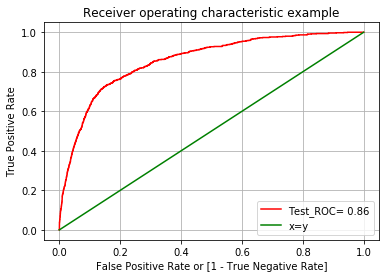

0.8571059669535007


In [640]:
auc_test=draw_roc_curve( y_pred_final.churn, y_pred_final.Churn_Prob )
print(auc_test)

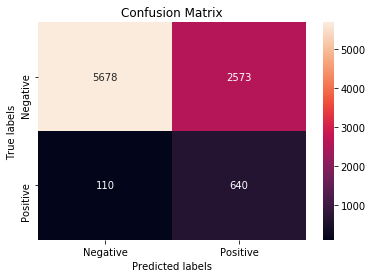

In [641]:
# Confusion matrix 
confusion=plotconfusionmatrix( y_pred_final.churn, y_pred_final.predicted )

In [642]:
print(classification_report(y_pred_final.churn,y_pred_final.predicted))

             precision    recall  f1-score   support

          0       0.98      0.69      0.81      8251
          1       0.20      0.85      0.32       750

avg / total       0.92      0.70      0.77      9001



In [643]:
getMetrics(y_pred_final.churn,y_pred_final.predicted)

Accuracy_score: 70.19% on test dataset
precision_score: 19.92% on test dataset
recall_score: 85.33% on test dataset
f1_score: 32.30% on test dataset


In [644]:
#Implementing RFE for feature selection using logictic model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight="balanced")

In [645]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [646]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True,  True, False,  True,  True,  True,  True, False, False,
       False, False,

<b> XG BOOST </b>

In [647]:
import xgboost as xgb

depth=[3,5,7,9]
learning_rate=[0.01,0.05,0.1,0.3,0.5]
parameters = {'max_depth':depth,'learning_rate':learning_rate}
model_GB = xgb.XGBClassifier(random_state=0)

cv_results_GB=ApplyGridSearchCV(model_GB,params)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 90.3min finished


In [648]:
cv_results_GB[cv_results_LR['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,11.077427,1.597349,0.054855,0.011209,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.230548,0.278287,0.267081,...,0.253426,0.020782,1,0.655506,0.671554,0.65011,0.668869,0.672453,0.663698,0.009131


In [649]:
model_GB = xgb.XGBClassifier(random_state=0,max_depth=5,learning_rate=200)
model_pca_GB = learner_pca_RF.fit(df_train_pca,y_train)

In [650]:
#Making prediction on the test data
pred_probs_test = model_pca_GB.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

#With 20 selected principal components and Random Forest model we have achieved 87% of accuracy 

'0.86'

In [651]:
# Predicted probabilities of conversion on test data set
y_pred=model_pca_GB.predict_proba(df_test_pca)
# Converting it into dataframe
y_pred_df=pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1=y_pred_df.iloc[:,[1]]

y_test_df = pd.DataFrame(y_test)

In [652]:
# Putting CustID to index to final output variable data set
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,churn,Churn_Prob
0,20296,1,0.504074
1,8279,1,0.471057
2,72269,0,0.281099
3,65602,0,0.222914
4,42758,1,0.537244


In [653]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)
# Let's see the head
y_pred_final.head()

#We have chosen probability cutoff as 0.5 i.e if probability >0.5 then potential lead is likely to churn  else not

,CustID,churn,Churn_Prob,predicted
0,20296,1,0.504074,1
1,8279,1,0.471057,1
2,72269,0,0.281099,0
3,65602,0,0.222914,0
4,42758,1,0.537244,1


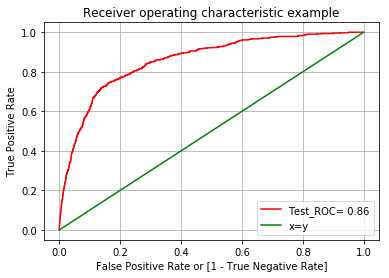

0.8574285137155091


In [654]:
auc_test=draw_roc_curve( y_pred_final.churn, y_pred_final.Churn_Prob )
print(auc_test)

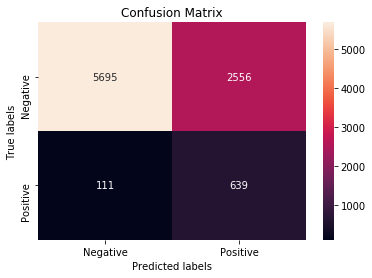

In [655]:
# Confusion matrix 
confusion=plotconfusionmatrix( y_pred_final.churn, y_pred_final.predicted )

In [656]:
print(classification_report(y_pred_final.churn,y_pred_final.predicted))

             precision    recall  f1-score   support

          0       0.98      0.69      0.81      8251
          1       0.20      0.85      0.32       750

avg / total       0.92      0.70      0.77      9001



In [657]:
getMetrics(y_pred_final.churn,y_pred_final.predicted)

Accuracy_score: 70.37% on test dataset
precision_score: 20.00% on test dataset
recall_score: 85.20% on test dataset
f1_score: 32.40% on test dataset
